In [1]:
import pickle

import pandas as pd
import numpy as np
from geopy import distance
from seaborn import heatmap, PairGrid, kdeplot
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

In [2]:
dfa = pd.read_pickle('./pickleJar/df_3_ML4aphy.pkl')

In [3]:
df = pd.read_pickle('./pickleJar/DevelopmentalDataSets/df_3_ML4chl.pkl')

In [4]:
df.head().T

,0,1,2,3,4
oisst,19.57,2.54,0.78,1.79,24.67
wt,NaN,NaN,1.19,1.61,NaN
sal,NaN,NaN,NaN,NaN,NaN
etopo2,462,3549,330,2193,4369
sola,201.5,4.6,27.8,38.6,203.5
solz,48.7,51.2,52.7,45.9,28
sat_rho_rc412,0.0120876,0.0105251,0.00444289,0.00586911,0.009464
sat_rho_rc443,0.0124167,0.0106362,0.00438667,0.00586578,0.008968
sat_rho_rc490,0.0117387,0.00961355,0.00424045,0.00553467,0.00771911
sat_rho_rc510,0.0105793,0.0079127,0.0036856,0.0046431,0.0059736


In [6]:
x = df.filter(regex='sat_rho_', axis=1)

In [7]:
x.shape

(495, 6)

In [8]:
l = [412, 443, 490, 510, 555, 670]

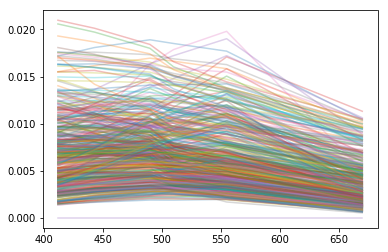

In [13]:
pl.plot(l, x.T, alpha=0.3);

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780,13.775000,19.600000,25.120000,30.510000
wt,158.0,19.741563,7.176002,1.100,13.872500,18.990000,25.882500,36.250000
sal,96.0,31.294687,5.939344,9.580,29.197500,33.560000,34.342500,37.010000
etopo2,495.0,768.961616,1410.753061,0.000,20.500000,156.000000,519.000000,5529.000000
sola,495.0,188.826667,51.128164,0.000,182.750000,191.900000,204.100000,356.700000
solz,495.0,31.291919,14.525706,0.000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,495.0,0.006742,0.003876,0.000,0.003706,0.005988,0.008865,0.020979
sat_rho_rc443,495.0,0.007025,0.003640,0.000,0.004168,0.006625,0.008941,0.020130
sat_rho_rc490,495.0,0.007243,0.003453,0.000,0.004514,0.006866,0.009144,0.018906
sat_rho_rc510,495.0,0.006734,0.003350,0.000,0.004123,0.005819,0.008748,0.018512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 19 columns):
oisst            495 non-null float64
wt               158 non-null float64
sal              96 non-null float64
etopo2           495 non-null float64
sola             495 non-null float64
solz             495 non-null float64
sat_rho_rc412    495 non-null float64
sat_rho_rc443    495 non-null float64
sat_rho_rc490    495 non-null float64
sat_rho_rc510    495 non-null float64
sat_rho_rc555    495 non-null float64
sat_rho_rc670    495 non-null float64
datetime         495 non-null datetime64[ns]
lat              495 non-null float64
lon              495 non-null float64
chl_fluo         364 non-null float64
chl_hplc         158 non-null float64
chl              424 non-null float64
is_hplc          495 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(17)
memory usage: 74.0 KB


In [3]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 33 columns):
oisst            495 non-null float64
etopo2           495 non-null float64
sola             495 non-null float64
solz             495 non-null float64
sat_rho_rc412    495 non-null float64
sat_rho_rc443    495 non-null float64
sat_rho_rc490    495 non-null float64
sat_rho_rc510    495 non-null float64
sat_rho_rc555    495 non-null float64
sat_rho_rc670    495 non-null float64
datetime         495 non-null datetime64[ns]
lat              495 non-null float64
lon              495 non-null float64
aphy405          495 non-null float64
aphy411          495 non-null float64
aphy443          495 non-null float64
aphy455          495 non-null float64
aphy465          495 non-null float64
aphy489          495 non-null float64
aphy510          495 non-null float64
aphy520          495 non-null float64
aphy530          495 non-null float64
aphy550          495 non-null float64
aphy555       

In [9]:
df.drop(['wt', 'sal', 'sola'], axis=1, inplace=True)

In [4]:
dfa.drop(['sola'], axis=1, inplace=True)

In [5]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780,13.775000,19.600000,25.120000,30.510000
etopo2,495.0,768.961616,1410.753061,0.000,20.500000,156.000000,519.000000,5529.000000
solz,495.0,31.291919,14.525706,0.000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,495.0,0.006742,0.003876,0.000,0.003706,0.005988,0.008865,0.020979
sat_rho_rc443,495.0,0.007025,0.003640,0.000,0.004168,0.006625,0.008941,0.020130
sat_rho_rc490,495.0,0.007243,0.003453,0.000,0.004514,0.006866,0.009144,0.018906
sat_rho_rc510,495.0,0.006734,0.003350,0.000,0.004123,0.005819,0.008748,0.018512
sat_rho_rc555,495.0,0.006170,0.003526,0.000,0.003430,0.005138,0.007997,0.019804
sat_rho_rc670,495.0,0.003537,0.002458,0.000,0.001666,0.002724,0.004723,0.011320
lat,495.0,28.887491,20.588358,-67.643,26.936900,32.400000,42.350000,79.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780,13.775000,19.600000,25.120000,30.510000
etopo2,495.0,768.961616,1410.753061,0.000,20.500000,156.000000,519.000000,5529.000000
solz,495.0,31.291919,14.525706,0.000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,495.0,0.006742,0.003876,0.000,0.003706,0.005988,0.008865,0.020979
sat_rho_rc443,495.0,0.007025,0.003640,0.000,0.004168,0.006625,0.008941,0.020130
sat_rho_rc490,495.0,0.007243,0.003453,0.000,0.004514,0.006866,0.009144,0.018906
sat_rho_rc510,495.0,0.006734,0.003350,0.000,0.004123,0.005819,0.008748,0.018512
sat_rho_rc555,495.0,0.006170,0.003526,0.000,0.003430,0.005138,0.007997,0.019804
sat_rho_rc670,495.0,0.003537,0.002458,0.000,0.001666,0.002724,0.004723,0.011320
lat,495.0,28.887491,20.588358,-67.643,26.936900,32.400000,42.350000,79.000000


In [11]:
df.to_pickle('./pickleJar/df_4_ML4chl.pkl')

In [6]:
dfa.to_pickle('./pickleJar/df_4_ML4aph.pkl')

Pre-processing plan:
* Standardize sat_rho_rcvvv
* Standardize oisst
* Log-transform then standardize etopo2 (depth)
* Log-transform then standardize chl
* create pairwise distance matrix for possible GP use:
    - geodesic distance from lat/lon
    - time difference in floating point doy
    - temperature
    - solz 
    - bathymetry
* pickle transformers for application to out-of-sample sets and reverse transformations.
* pickle pairwise distance matrices

In [47]:
geodistvec_km = distmat

In [50]:
# Create distance matrix from lat/lon vectors
latlon = df[['lat', 'lon']].values
geodistvec_km = pdist(latlon, lambda u, v: distance.geodesic((u[0], u[1]),
                                                             (v[0], v[1])).km)
geodistmat_km = squareform(geodistvec_km)
with open('./pickleJar/pairwise_dist_geodesicdist_km.pkl', 'wb') as f:
    pickle.dump(geodistmat_km, f)

In [51]:
# Create pairwise distance matrix for temperature
tempdist = pdist(df.oisst.values.reshape(-1, 1), 'euclidean')
tdistmat = squareform(tempdist)
with open('./pickleJar/pairwise_dist_temperature.pkl', 'wb') as f:
    pickle.dump(tdistmat, f)

In [ ]:
# Create pairwise distance matrix for doy
